In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#These are correct
def giveErrorsDiag_N4(delta, phi, k1t, k2t):
    errors = np.zeros((7,7), dtype=object)
    errors[1,1]= 8*(k1t**2-k2t**2)*np.cos(2*delta)
    errors[2,2]= -16*k1t**2*np.cos(2*delta)
    errors[2,3]= 8*np.exp(1j*phi)*np.sin(2*delta)*np.sqrt(k1t)*np.sqrt(k2t)*(k1t+k2t)
    errors[3,3]= 16*k2t**2*np.cos(2*delta)
    errors[4,5]= -4*np.sqrt(2)*np.exp(-1j*phi)*np.sin(2*delta)*k1t**(3/2)*np.sqrt(k2t)
    errors[4,6]= -4*np.sqrt(2)*np.exp(1j*phi)*np.sin(2*delta)*np.sqrt(k1t)*(k2t)**(3/2)
    errors[5,5]= 8*np.cos(2*delta)*k1t**2
    errors[6,6]= -8*np.cos(2*delta)*k2t**2
    errors=errors[1:, 1:]
    return errors + errors.T - np.diag(errors)

def giveErrorsDiag_N2(delta, phi, k1t, k2t):
    errors = np.zeros((7,7), dtype=object)
    errors[1,1]= 2 * np.cos(2*delta) * (k1t**2 - k2t**2)
    errors[2,2] = -4 * k1t**2 * np.cos(2*delta)
    errors[2,3] = 2 * (k1t + k2t) * np.exp(1j*phi) * np.sin(delta*2) * np.sqrt(k1t) * np.sqrt(k2t)
    errors[3,3] = 4 * k2t**2 * np.cos(2*delta)
    errors[4,5] = -np.sqrt(2) * np.exp(-1j * phi) * np.sin(2*delta) * k1t**(3/2) * np.sqrt(k2t)
    errors[4,6] = -np.sqrt(2) * np.exp(1j * phi) * np.sin(2*delta) * k2t**(3/2) * np.sqrt(k1t)
    errors[5,5] = 2 * k1t**2 * np.cos(2 * delta)
    errors[6,6] = -2 * k2t**2 * np.cos(2*delta)
    errors=errors[1:, 1:]
    # Mirror over diagonal
    return errors + errors.T - np.diag(errors)

def giveErrors01_N2(delta, phi,k1t,k2t):
    errors = np.zeros((7,7), dtype=object)
    errors[1,1]=1/8*(k1t**2-k2t**2)*np.exp(-2j*phi)*(6+np.exp(4j*phi))*(np.sin(2*delta))**2
    errors[2,2]=-np.exp(-2j*phi)*(6+np.exp(4j*phi))*1/4*(np.sin(2*delta))**2*k1t*(k1t-k2t)
    errors[2,3]=1/2*np.sin(2*delta)*np.exp(-1j*phi)*(k1t-k2t)*np.sqrt(k1t*k2t)*(-6*(np.cos(delta))**2+np.exp(4j*phi)*(np.sin(delta))**2)
    errors[3,3]=np.exp(-2j*phi)*(6+np.exp(4j*phi))*1/4*(np.sin(2*delta))**2*k2t*(k1t-k2t)
    errors[4,4]=-k1t*k2t*np.exp(-2j*phi)*(6+np.exp(4j*phi))*1/4*(np.sin(2*delta))**2
    errors[4,5]=1/np.sqrt(2)*np.exp(-3j*phi)*1/2*np.sin(2*delta)*k1t**(3/2)*np.sqrt(k2t)*(-6*(np.sin(delta))**2+np.exp(4j*phi)*(np.cos(delta))**2)
    errors[4,6]=1/np.sqrt(2)*np.exp(-1j*phi)*1/2*np.sin(2*delta)*np.sqrt(k1t)*(k2t)**(3/2)*(-6*(np.cos(delta))**2+np.exp(4j*phi)*(np.sin(delta))**2)
    errors[5,5]=1/8*k1t**2*np.exp(-2j*phi)*(6+np.exp(4j*phi))*(np.sin(2*delta))**2
    errors[5,6]=1/2*k1t*k2t*(6*(np.cos(delta))**4+np.exp(4j*phi)*(np.sin(delta))**4)
    errors[6,6]=1/8*k2t**2*np.exp(-2j*phi)*(6+np.exp(4j*phi))*(np.sin(2*delta))**2
    errors=errors[1:, 1:]
    return errors

#Not including EidEi terms since they are unneeded
def giveErrors10_N2(phi,delta,k1t,k2t):
    errors = np.zeros((7,7), dtype=object)
    errors[2,3]=1/2*np.sin(2*delta)*np.exp(-1j*phi)*(k1t-k2t)*np.sqrt(k1t*k2t)*(-(np.cos(delta))**2+6*np.exp(4j*phi)*(np.sin(delta)**2))
    errors[4,5]=1/np.sqrt(2)*np.exp(-3j*phi)*1/2*np.sin(2*delta)*k1t**(3/2)*np.sqrt(k2t)*(-(np.sin(delta))**2+6*np.exp(4j*phi)*(np.cos(delta))**2)
    errors[4,6]=-1/np.sqrt(2)*np.exp(-1j*phi)*1/2*np.sin(2*delta)*np.sqrt(k1t)*(k2t)**(3/2)*((np.cos(delta))**2-6*np.exp(4j*phi)*(np.sin(delta))**2)
    errors[5,6]=1/2*k1t*k2t*((np.cos(delta))**4+6*np.exp(4j*phi)*(np.sin(delta))**4)
    errors=errors[1:, 1:]
    return errors

# Join the upper and lower halves
def giveErrorsOffDiag_N2(phi, delta, k1t, k2t):
    return giveErrors01_N2(phi, delta, k1t, k2t) + giveErrors10_N2(phi, delta, k1t, k2t).T

def errsum_N2(delta,phi,k1t, k2t):
    return np.abs(giveErrorsDiag_N2(delta, phi, k1t, k2t))**2 + np.abs(giveErrorsOffDiag_N2(delta, phi, k1t, k2t))**2

def errsum_N4(delta, phi, k1t, k2t):
    return np.abs(giveErrorsDiag_N4(delta, phi, k1t, k2t))**2


In [2]:
#Optimization
k1t=10**(-2)
k2t=10**(-2)

def objectiveN2(x, k1t, k2t):
    delta, phi=x
    return np.sum(errsum_N2(delta, phi, k1t, k2t))

def objectiveN4(x, k1t, k2t):
    delta, phi=x
    return np.sum(errsum_N4(delta, phi, k1t, k2t))

x0=[3*np.pi/4, np.pi/4]

resN2=minimize(objectiveN2, x0, args=(1e-2, 1e-2), method='Nelder-Mead')
print("Optimal parameters: ", resN2.x)
print("Lowest value: ", resN2.fun)

x0=[3*np.pi/4, 3*np.pi/4]
resN4=minimize(objectiveN2, x0, args=(1e-2, 1e-3), method='Nelder-Mead')
print("Optimal parameters: ", resN4.x)
print("Lowest value: ", resN4.fun)


Optimal parameters:  [2.35339389e+00 1.01470380e-05]
Lowest value:  4.716575256070842e-07
Optimal parameters:  [2.34624754 2.38809721]
Lowest value:  4.194610968647449e-08


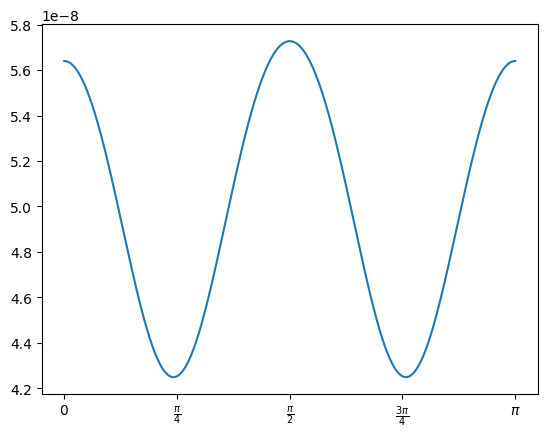

In [3]:
# Test plots

delta = np.linspace(0, np.pi, 1000)
phi = np.linspace(0,np.pi, 1000)


plt.plot(delta, np.sum(errsum_N2(3*np.pi/4 , phi, 1e-2, 1e-3)))

ticks = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
labels = [
    r"$0$",
    r"$\frac{\pi}{4}$",
    r"$\frac{\pi}{2}$",
    r"$\frac{3\pi}{4}$",
    r"$\pi$",
]

plt.xticks(ticks, labels)
plt.show()



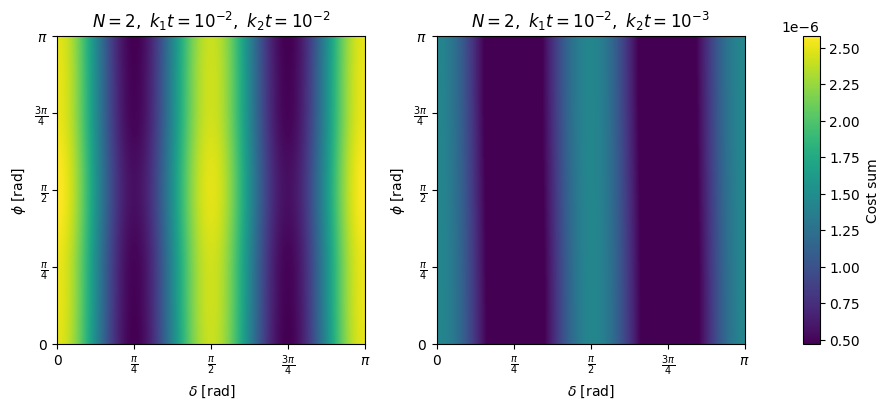

In [4]:
delta = np.linspace(0, np.pi, 1000)
phi = np.linspace(0,np.pi, 1000)

Delta, Phi = np.meshgrid(delta, phi)
k1t, k2t = 1e-2, 1e-2
Z1 = np.sum(errsum_N2(Delta, Phi, k1t, k2t))

k1t2, k2t2 = 1e-2, 1e-3
Z2 = np.sum(errsum_N2(Delta, Phi, k1t2, k2t2))

fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.05])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])  # colorbar axis

im1 = ax1.imshow(
    Z1,
    origin="lower",
    extent=[0, np.pi, 0, np.pi],
)

im2 = ax2.imshow(
    Z2,
    origin="lower",
    extent=[0, np.pi, 0, np.pi],
    vmin=Z1.min(),
    vmax=Z1.max(),
)

# Shared colorbar with matched height
fig.colorbar(im1, cax=cax, label="Cost sum")
ticks = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
labels = [
        r"$0$",
        r"$\frac{\pi}{4}$",
        r"$\frac{\pi}{2}$",
        r"$\frac{3\pi}{4}$",
        r"$\pi$",
]
for ax in (ax1, ax2):
    ax.set_xticks(ticks, labels)
    ax.set_yticks(ticks, labels)
    ax.set_xlabel(r"$\delta$ [rad]")
    ax.set_ylabel(r"$\phi$ [rad]")
    ax.set_box_aspect(1)
    ax.plot(
        marker="o",
        markersize=8,
        markeredgecolor="white",
        markerfacecolor="none",
        linewidth=2,)

ax1.set_title(r"$N=2,\ k_1t=10^{-2},\ k_2t=10^{-2}$")
ax2.set_title(r"$N=2,\ k_1t=10^{-2},\ k_2t=10^{-3}$")

plt.show()

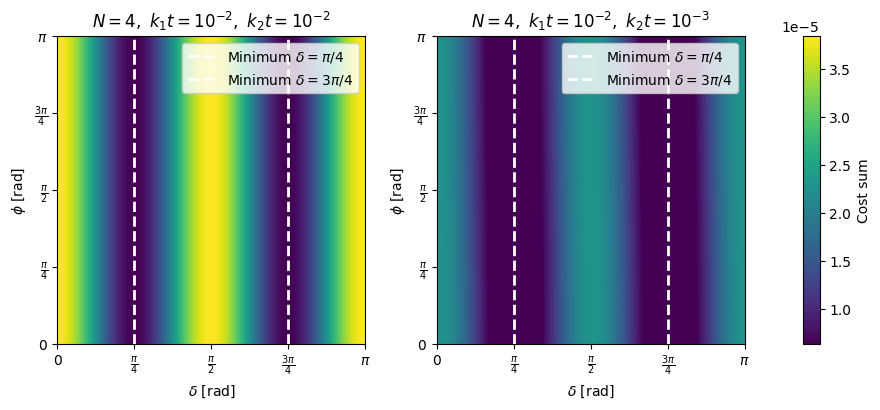

In [5]:
Delta, Phi = np.meshgrid(delta, phi)
k1t, k2t = 1e-2, 1e-2
Z1 = np.sum(errsum_N4(Delta, Phi, k1t, k2t))

k1t2, k2t2 = 1e-2, 1e-3
Z2 = np.sum(errsum_N4(Delta, Phi, k1t2, k2t2))

fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 0.05])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
cax = fig.add_subplot(gs[0, 2])  # colorbar axis

im1 = ax1.imshow(
    Z1,
    origin="lower",
    extent=[0, np.pi, 0, np.pi],
)

im2 = ax2.imshow(
    Z2,
    origin="lower",
    extent=[0, np.pi, 0, np.pi],
    vmin=Z1.min(),
    vmax=Z1.max(),
)

# Shared colorbar with matched height
fig.colorbar(im1, cax=cax, label="Cost sum")

for ax in (ax1, ax2):
    ax.set_xticks(ticks, labels)
    ax.set_yticks(ticks, labels)
    ax.set_xlabel(r"$\delta$ [rad]")
    ax.set_ylabel(r"$\phi$ [rad]")
    ax.set_box_aspect(1)
    ax.axvline(
        np.pi/4,
        color="white",
        linestyle="--",
        linewidth=2,
        label=rf"Minimum $\delta=\pi/4$",
    )    
    ax.axvline(
        3*np.pi/4,
        color="white",
        linestyle="--",
        linewidth=2,
        label=rf"Minimum $\delta=3\pi/4$",
    )

deltaN2, phiN2=7.87715912e-01, 0
deltaN4, phiN4=7.85398162e-01, 0
#h1, = ax1.plot(deltaN2, phiN2, label="Lowest point", **marker_kwargs)

# Add legend (only once)
ax1.legend(loc="upper right", frameon=True)
ax2.legend(loc="upper right", frameon=True)

ax1.set_title(r"$N=4,\ k_1t=10^{-2},\ k_2t=10^{-2}$")
ax2.set_title(r"$N=4,\ k_1t=10^{-2},\ k_2t=10^{-3}$")

plt.show()

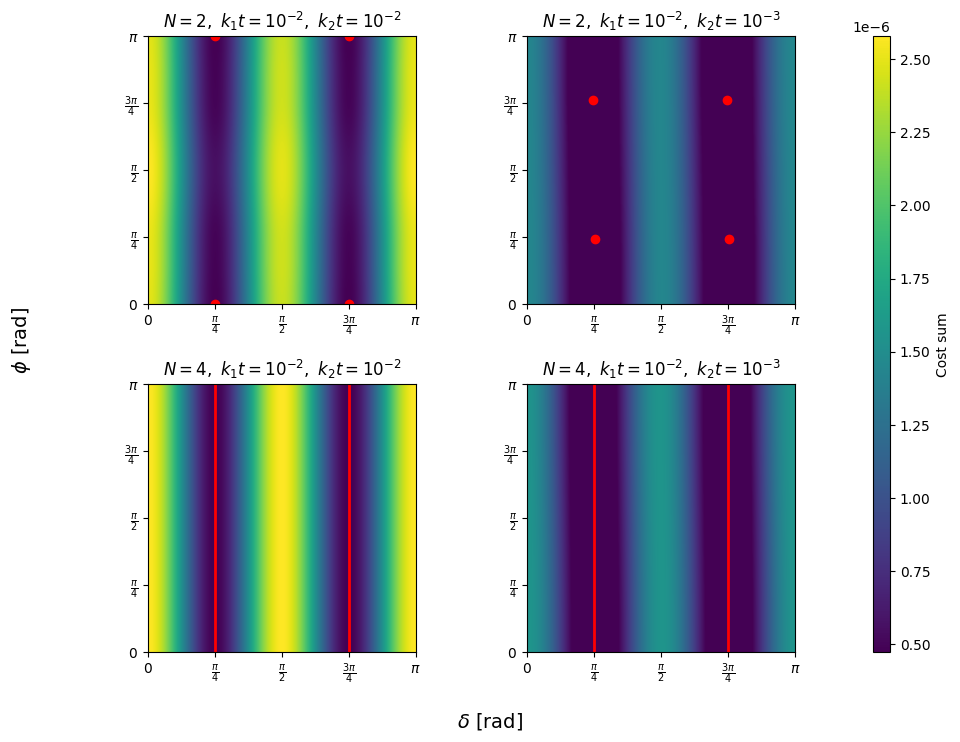

In [189]:
import numpy as np
import matplotlib.pyplot as plt

delta = np.linspace(0, np.pi, 1000)
phi = np.linspace(0, np.pi, 1000)
Delta, Phi = np.meshgrid(delta, phi)

ticks = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
labels = [
    r"$0$",
    r"$\frac{\pi}{4}$",
    r"$\frac{\pi}{2}$",
    r"$\frac{3\pi}{4}$",
    r"$\pi$",
]

# =========================
# Figure + GridSpec
# =========================
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 3, width_ratios=[1, 1, 0.05], hspace=0.3)

ax11 = fig.add_subplot(gs[0, 0])
ax12 = fig.add_subplot(gs[0, 1], sharex=ax11, sharey=ax11)
ax21 = fig.add_subplot(gs[1, 0], sharex=ax11, sharey=ax11)
ax22 = fig.add_subplot(gs[1, 1], sharex=ax11, sharey=ax11)

cax = fig.add_subplot(gs[:, 2])

# =========================
# N = 2 (top row)
# =========================
Z11 = np.sum(errsum_N2(Delta, Phi, 1e-2, 1e-2))
Z12 = np.sum(errsum_N2(Delta, Phi, 1e-2, 1e-3))

im = ax11.imshow(Z11, origin="lower", extent=[0, np.pi, 0, np.pi])
ax12.imshow(
    Z12,
    origin="lower",
    extent=[0, np.pi, 0, np.pi],
    vmin=Z11.min(),
    vmax=Z11.max(),
)

ax11.set_title(r"$N=2,\ k_1t=10^{-2},\ k_2t=10^{-2}$")
ax12.set_title(r"$N=2,\ k_1t=10^{-2},\ k_2t=10^{-3}$")

# =========================
# N = 4 (bottom row)
# =========================
Z21 = np.sum(errsum_N4(Delta, Phi, 1e-2, 1e-2))
Z22 = np.sum(errsum_N4(Delta, Phi, 1e-2, 1e-3))

ax21.imshow(Z21, origin="lower", extent=[0, np.pi, 0, np.pi])
ax22.imshow(
    Z22,
    origin="lower",
    extent=[0, np.pi, 0, np.pi],
    vmin=Z21.min(),
    vmax=Z21.max(),
)

ax21.set_title(r"$N=4,\ k_1t=10^{-2},\ k_2t=10^{-2}$")
ax22.set_title(r"$N=4,\ k_1t=10^{-2},\ k_2t=10^{-3}$")

# =========================
# Common limits & ticks
# =========================
ax11.set_xlim(0, np.pi)
ax11.set_ylim(0, np.pi)

for ax in (ax11, ax12, ax21, ax22):
    ax.set_xticks(ticks, labels)
    ax.set_yticks(ticks, labels)
    ax.set_box_aspect(1)

# =========================
# N = 4 vertical minima
# =========================
for ax in (ax21, ax22):
    ax.axvline(
        np.pi / 4,
        color="red",
        #linestyle="--",
        linewidth=2,
        label=r"Minimum $\delta=\pi/4$",
    )
    ax.axvline(
        3 * np.pi / 4,
        color="red",
        #linestyle="--",
        linewidth=2,
        label=r"Minimum $\delta=3\pi/4$",
    )

ax11.plot(7.87724755e-01, 0, marker='o', color='red')
ax11.plot(7.87724755e-01, np.pi, marker='o', color='red')
ax11.plot(2.35387735e+0, 0, marker='o', color='red')
ax11.plot(2.35387735e+0, np.pi, marker='o', color='red')

ax12.plot(0.77742239, 2.38664668, marker='o', color='red')
ax12.plot(0.79386871, 0.75462043, marker='o', color='red')
ax12.plot(2.364166, 0.75494649, marker='o', color='red')
ax12.plot(2.34772862, 2.38701326, marker='o', color='red')

#ax21.legend(loc="upper right", frameon=True)

# =========================
# Global axis labels (span all subplots)
# =========================
fig.supxlabel(r"$\delta$ [rad]", fontsize=14)
fig.supylabel(r"$\phi$ [rad]", fontsize=14)

# =========================
# Shared colorbar
# =========================
fig.colorbar(im, cax=cax, label="Cost sum")

plt.show()


In [206]:
M=print(errsum_N2(np.pi/4, np.pi/4, 1e-2, 1e-3))

[[np.float64(3.828515625e-09) np.float64(5.999039130647431e-40)
  np.float64(5.999039130647431e-44) 0 np.float64(1.4997597826618577e-40)
  np.float64(1.4997597826618577e-44)]
 [np.float64(1.469914562986887e-40) np.float64(1.2656250000000006e-08)
  np.float64(7.320625000000003e-09) 0 np.float64(1.4997597826618577e-40)
  np.float64(1.4997597826618577e-44)]
 [np.float64(1.469914562986887e-40) np.float64(7.320625000000004e-09)
  np.float64(1.2656250000000002e-10) 0 np.float64(1.4997597826618577e-40)
  np.float64(1.4997597826618577e-44)]
 [np.float64(1.469914562986887e-40) np.float64(5.999039130647431e-40)
  np.float64(5.999039130647431e-44) np.float64(1.5625e-10)
  np.float64(3.5312500000000023e-09) np.float64(3.5312500000000027e-11)]
 [np.float64(1.469914562986887e-40) np.float64(5.999039130647431e-40)
  np.float64(5.999039130647431e-44) np.float64(3.5312500000000014e-09)
  np.float64(3.90625e-09) np.float64(3.906250000000003e-11)]
 [np.float64(1.469914562986887e-40) np.float64(5.99903913

[[np.float64(2.351863300779019e-39) np.float64(9.59846260903589e-39)
  np.float64(9.59846260903589e-43) 0 np.float64(2.3996156522589723e-39)
  np.float64(2.3996156522589724e-43)]
 [np.float64(2.351863300779019e-39) np.float64(9.59846260903589e-39)
  np.float64(7.744e-08) 0 np.float64(2.3996156522589723e-39)
  np.float64(2.3996156522589724e-43)]
 [np.float64(2.351863300779019e-39) np.float64(7.744000000000006e-08)
  np.float64(9.59846260903589e-43) 0 np.float64(2.3996156522589723e-39)
  np.float64(2.3996156522589724e-43)]
 [np.float64(2.351863300779019e-39) np.float64(9.59846260903589e-39)
  np.float64(9.59846260903589e-43) 0 np.float64(3.200000000000002e-08)
  np.float64(3.200000000000002e-10)]
 [np.float64(2.351863300779019e-39) np.float64(9.59846260903589e-39)
  np.float64(9.59846260903589e-43) np.float64(3.2e-08)
  np.float64(2.3996156522589723e-39) np.float64(2.3996156522589724e-43)]
 [np.float64(2.351863300779019e-39) np.float64(9.59846260903589e-39)
  np.float64(9.59846260903589e

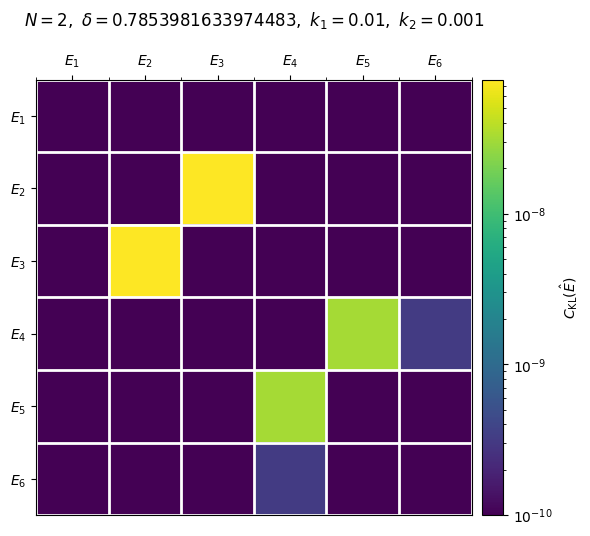

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# -----------------------------
# 1. Define the matrix
# -----------------------------
delta, phi, k1t, k2t = np.pi/4, 0, 1e-2, 1e-3
M = errsum_N4(delta, phi, k1t, k2t)
print(M)
M = np.asarray(M, dtype=float)
M = np.abs(M)
M[~np.isfinite(M)] = 1e-20
M[M <= 0] = 1e-20

N = M.shape[0]
# -----------------------------
# 2. Create the figure
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 6))

# -----------------------------
# 3. Plot matrix elements
# -----------------------------
im = ax.imshow(
    M,
    cmap="viridis",
    aspect="equal",
    origin="upper",
    norm=LogNorm(vmin=1e-10, vmax=M.max())
)

# -----------------------------
# 4. Axis ticks and labels
# -----------------------------
labels = [rf"$E_{{{i}}}$" for i in range(1, N + 1)]

ax.set_xticks(range(N))
ax.set_yticks(range(N))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.xaxis.tick_top()

# -----------------------------
# 5. Grid lines
# -----------------------------
ax.set_xticks(np.arange(-0.5, N, 1), minor=True)
ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
ax.grid(which="minor", color="white", linewidth=2)
ax.tick_params(which="minor", bottom=False, left=False)

# -----------------------------
# 6. Title
# -----------------------------
ax.set_title(
    rf"$N=2,\ \delta={delta},\ k_1={k1t},\ k_2={k2t}$",
    pad=20
)

# -----------------------------
# 7. Colorbar (same height as matrix)
# -----------------------------
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cbar = plt.colorbar(im, cax=cax)
cbar.set_label(r"$C_{\mathrm{KL}}(\hat{E})$")

# -----------------------------
# 8. Show
# -----------------------------
plt.tight_layout()
plt.show()


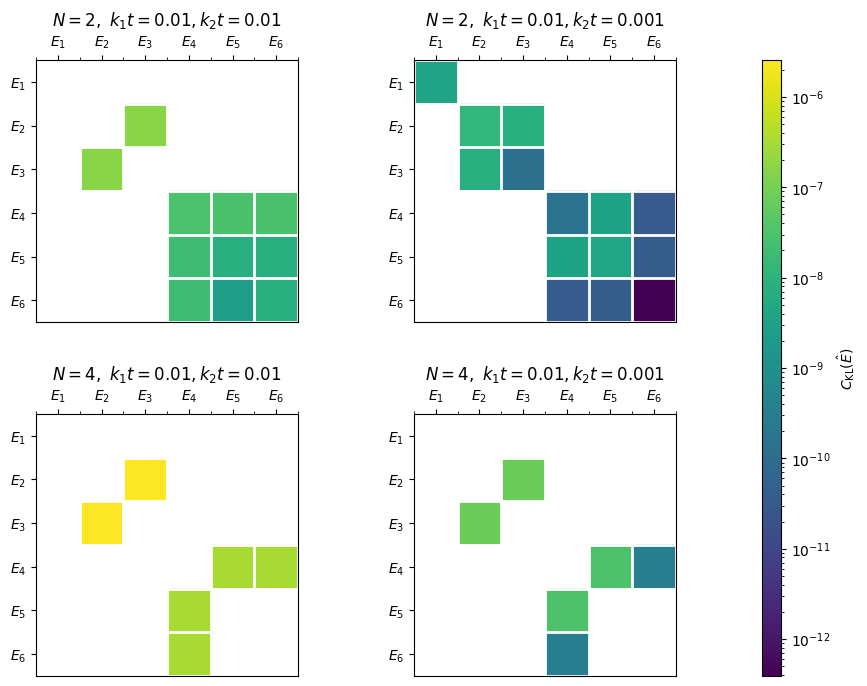

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec

# -------------------------------------------------
# Parameters
# -------------------------------------------------
delta = 0.79
phi = 0

k_equal = (1e-2, 1e-2)
k_diff  = (1e-2, 2e-3)

# -------------------------------------------------
# Figure + GridSpec
# -------------------------------------------------
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(
    2, 3,
    width_ratios=[1, 1, 0.06],   # last column = colorbar
    wspace=0.25,
    hspace=0.35
)

axs = {
    "N2_eq": fig.add_subplot(gs[0, 0]),
    "N2_df": fig.add_subplot(gs[0, 1]),
    "N4_eq": fig.add_subplot(gs[1, 0]),
    "N4_df": fig.add_subplot(gs[1, 1]),
}

cax = fig.add_subplot(gs[:, 2])   # colorbar spans both rows

# -------------------------------------------------
# Helper function
# -------------------------------------------------
def compute_matrix(N, delta, phi, k1t, k2t):
    if N == 2:
        M = errsum_N2(delta, phi, k1t, k2t)
    elif N == 4:
        M = errsum_N4(delta, phi, k1t, k2t)

    M = M
    M = np.asarray(M, dtype=float)
    M = np.abs(M)
    M[M < 10**-30]=0 # Clamp any values that are close to zero (numerical imprecision). The values I observe are as smallest 10^-13, so should be safe
    # M[~np.isfinite(M)] = 1e-20
    # M[M <= 0] = 1e-20
    return M

# -------------------------------------------------
# Compute matrices
# -------------------------------------------------
Mats = {
    "N2_eq": compute_matrix(2, np.pi/4, 0, 1e-2, 1e-2),
    "N2_df": compute_matrix(2, np.pi/4, np.pi/4, 1e-2, 1e-3),
    "N4_eq": compute_matrix(4, np.pi/4, 0, 1e-2, 1e-2),
    "N4_df": compute_matrix(4, np.pi/4, 0, 1e-2, 1e-3),
}

# Shared normalization
vmin = min(M[M>0].min() for M in Mats.values())
vmax = max(M.max() for M in Mats.values())
norm = LogNorm(vmin=vmin, vmax=vmax)


# -------------------------------------------------
# Setup colourmap
# -------------------------------------------------
import copy
cmap = copy.copy(plt.colormaps["viridis"])
cmap.set_bad(color="grey")

# -------------------------------------------------
# Plot panels
# -------------------------------------------------
for key, ax in axs.items():
    M = Mats[key]
    N = M.shape[0]

    im = ax.imshow(
        M,
        cmap=cmap,
        norm=norm,
        aspect="equal",
        origin="upper"
    )

    labels = [rf"$E_{{{i}}}$" for i in range(1, N + 1)]
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.xaxis.tick_top()

    ax.set_xticks(np.arange(-0.5, N, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, N, 1), minor=True)
    ax.grid(which="minor", color="white", linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False)

# -------------------------------------------------
# Titles (semantic, not technical)
# -------------------------------------------------
axs["N2_eq"].set_title(r"$N=2, \ k_1t=0.01, k_2t=0.01$")
axs["N2_df"].set_title(r"$N=2, \ k_1t=0.01, k_2t=0.001$")
axs["N4_eq"].set_title(r"$N=4, \ k_1t=0.01, k_2t=0.01$")
axs["N4_df"].set_title(r"$N=4, \ k_1t=0.01, k_2t=0.001$")

# -------------------------------------------------
# Shared colorbar
# -------------------------------------------------
cbar = fig.colorbar(im, cax=cax)
cbar.set_label(r"$C_{\mathrm{KL}}(\hat{E})$")

# -------------------------------------------------
# Show
# -------------------------------------------------
plt.show()
